In [1]:
%matplotlib inline
import matplotlib as mlp
mlp.rcParams['figure.figsize'] = 10, 15
import matplotlib.pyplot as plt
import rawpy
import numpy as np

In [2]:
raw = rawpy.imread("./hq_cam_color_checker_new.dng")
# raw image displayed with no margin
bayer = raw.raw_image_visible.copy()
raw.close()

In [3]:
 def get_bayer_color(bayer, y1, y2, x1, x2):
    red = []
    green = []
    blue = []
    black_level = 256
    for y in range(y1, y2):
        for x in range(x1, x2):
            if y%2==0:
                if x%2==0:
                    blue.append(bayer[y][x]-black_level)
                else:
                    green.append(bayer[y][x]-black_level)
            else:
                if x%2==0:
                    green.append(bayer[y][x]-black_level)
                else:
                    red.append(bayer[y][x]-black_level)
    
    return red, green, blue

In [4]:
#plt.hist(np.log10(red) ,alpha=0.5, label='R', color='r')
#plt.hist(np.log10(green) ,alpha=0.5, label='G', color='g')
#plt.hist(np.log10(blue) ,alpha=0.5, label='B', color='b')
#plt.legend(loc='upper left')
#plt.show()

In [5]:
# A1 - F4
dict_cc_field = {"A1":[250,750, 50,550],
                "A2":[950,1450, 50,550],
                "A3":[1600,2100, 50,550],
                "A4":[2300,2800, 50,550],
                "B1":[250,750, 750,1250],
                "B2":[950,1450, 750,1250],
                "B3":[1600,2100, 750,1250],
                "B4":[2300,2800, 750,1250],
                "C1":[250,750, 1400,1900],
                "C2":[950,1450, 1400,1900],
                "C3":[1600,2100, 1400,1900],
                "C4":[2300,2800, 1400,1900],
                "D1":[250,750, 2050,2550],
                "D2":[950,1450, 2050,2550],
                "D3":[1600,2100, 2050,2550],
                "D4":[2300,2800, 2050,2550],
                "E1":[250,750, 2750,3250],
                "E2":[950,1450, 2750,3250],
                "E3":[1600,2100, 2750,3250],
                "E4":[2300,2800, 2750,3250],
                "F1":[250,750, 3450,3950],
                "F2":[950,1450, 3450,3950],
                "F3":[1600,2100, 3450,3950],
                "F4":[2300,2800, 3450,3950]
                }

In [6]:
# blue green red gray_card
#tiles = ["A3", "B3", "C3", "D4"]

#for i, tile in enumerate(tiles):
#        y1 = int(dict_cc_field[tile][0])
#        y2 = int(dict_cc_field[tile][1])
#        x1 = int(dict_cc_field[tile][2])
#        x2 = int(dict_cc_field[tile][3])
#        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)
#        plt.hist(np.log10(red) ,alpha=0.5, label='R', color='r')
#        plt.hist(np.log10(green) ,alpha=0.5, label='G', color='g')
#        plt.hist(np.log10(blue) ,alpha=0.5, label='B', color='b')
#        plt.legend(loc='upper left')
#        plt.savefig(f'./Documents/{tile}.png')
#        plt.show()


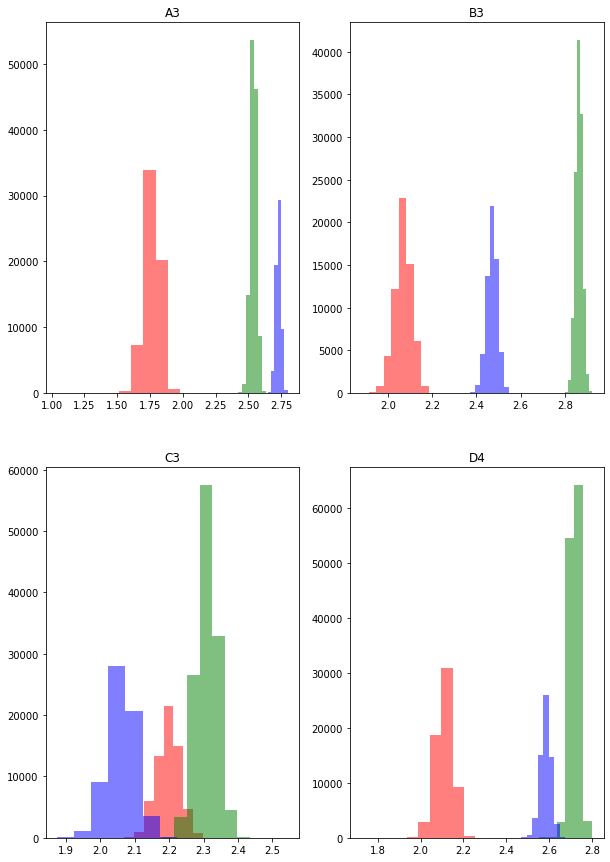

In [7]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

# plot data with subplots
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)
        if i==0:
            ax1.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")


plt.savefig(f'./Documents/subplots_4_title.png')
plt.show()

In [8]:
# white balanced bayer data

In [9]:
# for white balancing of bayer data 
def correct_bayer_wb(bayer, wb):
    # wb: [red, green, blue, green]
    for y in range(bayer.shape[0]):
        for x in range(bayer.shape[1]):
            if y%2==0:
                if x%2==0:
                    # blue
                    bayer[y][x] = bayer[y][x]*wb[2]
                else:
                    # green
                    bayer[y][x] = bayer[y][x]*wb[1]
            else:
                if x%2==0:
                    # green
                    bayer[y][x] = bayer[y][x]*wb[1]
                else:
                    # red
                    bayer[y][x] = bayer[y][x]*wb[0]
    
    return bayer

In [10]:
# define position of gray card
#[2300,2800, 2050,2550]
y1 = 2300
y2 = 2800
x1 = 2050
x2 = 2550

red, green, blue = get_bayer_color(bayer, y1, y2, x1, x2)

red_median = np.median(red)
green_median = np.median(green)
blue_median = np.median(blue)
print(red_median, green_median, blue_median)

# wb: [red, green, blue, green]
base_wb = [green_median/red_median, 1.0, green_median/blue_median, 1.0]
print(base_wb)

# multiply every pixel with the corresponding base wb value
bayer_corr = correct_bayer_wb(bayer, base_wb)

129.0 524.0 383.0
[4.062015503875969, 1.0, 1.3681462140992167, 1.0]


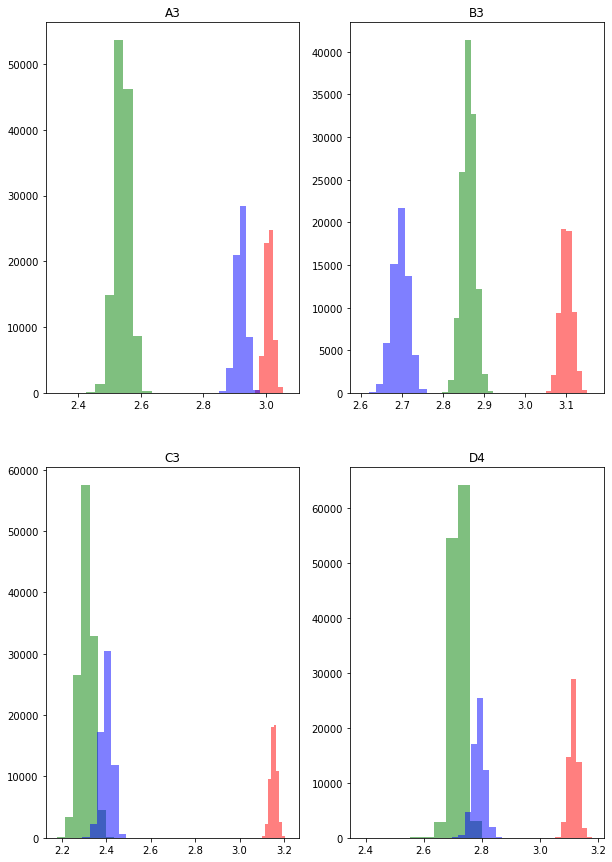

In [11]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

# plot data with subplots
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_bayer_color(bayer_corr, y1, y2, x1, x2)
        if i==0:
            ax1.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")


plt.savefig(f'./Documents/subplots_4_bayer_wb_corrected.png')
plt.show()

In [12]:
# color check after white balance
y1 = 2300
y2 = 2800
x1 = 2050
x2 = 2550

red, green, blue = get_bayer_color(bayer_corr, y1, y2, x1, x2)

red_median = np.median(red)
green_median = np.median(green)
blue_median = np.median(blue)
print(red_median, green_median, blue_median)

# before: 129.0 524.0 383.0
# now: 1307.0 524.0 618.0

1307.0 524.0 618.0


In [13]:
# plot demosaic values

In [14]:
# for demosaic
def demosaic_raw_rgb(bayer):
    rgb = np.zeros([bayer.shape[0],bayer.shape[1],3]) 
    for y in range(bayer.shape[0]):
        for x in range(bayer.shape[1]):
            # marginal condition
            if y==3039 or x==4055:
                if y%2==0:
                    if x%2==0:
                        # blue
                        g = bayer[y-1][x]+bayer[y][x-1]
                        rgb[y][x] = [bayer[y-1][x-1],g/2,bayer[y][x]]                  
                    else:
                        # green
                        g = bayer[y][x]+bayer[y-1][x-1]
                        rgb[y][x] = [bayer[y-1][x],g/2,bayer[y][x-1]]                    
                else:
                    if x%2==0:
                        # green
                        g = bayer[y][x]+bayer[y-1][x-1]
                        rgb[y][x] = [bayer[y][x-1],g/2,bayer[y-1][x]] 
                    else:
                        g = bayer[y-1][x]+bayer[y][x-1]
                        rgb[y][x] = [bayer[y][x],g/2,bayer[y-1][x-1]]  
                        # red
            else:
                if y%2==0:
                    if x%2==0:
                        # blue
                        g = bayer[y+1][x]+bayer[y][x+1]
                        rgb[y][x] = [bayer[y+1][x+1],g/2,bayer[y][x]]                  
                    else:
                        # green
                        g = bayer[y][x]+bayer[y+1][x+1]
                        rgb[y][x] = [bayer[y+1][x],g/2,bayer[y][x+1]]                    
                else:
                    if x%2==0:
                        # green
                        g = bayer[y][x]+bayer[y+1][x+1]
                        rgb[y][x] = [bayer[y][x+1],g/2,bayer[y+1][x]] 
                    else:
                        g = bayer[y+1][x]+bayer[y][x+1]
                        rgb[y][x] = [bayer[y][x],g/2,bayer[y+1][x+1]]  
                        # red
                    
    return rgb

In [15]:
# 3 dimension split
def get_3_dimension_split(array, y1, y2, x1, x2):
    d1 = []
    d2 = []
    d3 = []
    for y in range(y1,y2):
        for x in range(x1,x2):
            d1.append(array[y][x][0])
            d2.append(array[y][x][1])
            d3.append(array[y][x][2])
            
    return d1, d2, d3

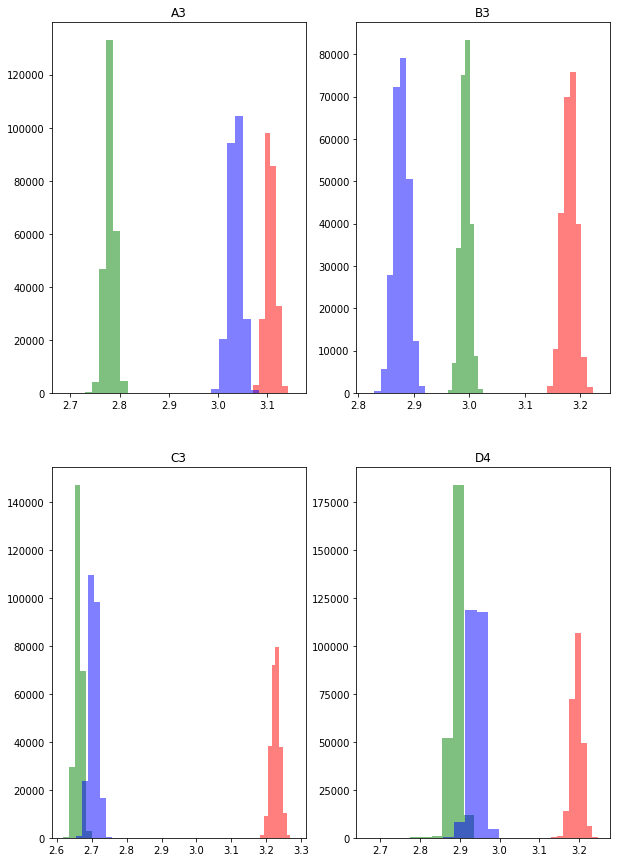

In [16]:
rgb_array = demosaic_raw_rgb(bayer)

# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

# plot data with subplots
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_3_dimension_split(rgb_array, y1, y2, x1, x2)
        if i==0:
            ax1.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")


plt.savefig(f'./Documents/subplots_4_demosaic.png')
plt.show()

In [17]:
# plot XYZ values


In [18]:
# forward matrix
# raw white-balanced demosaiced data: rgb to XYZ
# table from dng meta data
CM = np.array([[0.3806826174, -0.09813511372, -0.008731900714 ],
                [-0.220981434, 0.888884902, 0.294952035 ],
                [0.06568053365, 0.1024207622, 0.5077140927]])

XYZ = np.zeros(rgb_array.shape)
for y in range(rgb_array.shape[0]):
    for x in range(rgb_array.shape[1]):
        pix = rgb_array[y,x,:]
        XYZ_pix = CM.dot(pix)
        XYZ[y,x,:] = XYZ_pix

In [19]:
# plot sRGB values

In [20]:
# convert XYZ to sRGB
TM = np.array([[3.2406, -1.5372, -0.4986],
                [-0.9689, 1.8758, 0.0415],
                [0.0557, -0.2040, 1.0570]])

sRGB = np.zeros(XYZ.shape)
for y in range(XYZ.shape[0]):
    for x in range(XYZ.shape[1]):
        pix = XYZ[y,x,:]
        sRGB_pix = TM.dot(pix)
        sRGB[y,x,:] = sRGB_pix
        
sRGB = abs(sRGB)

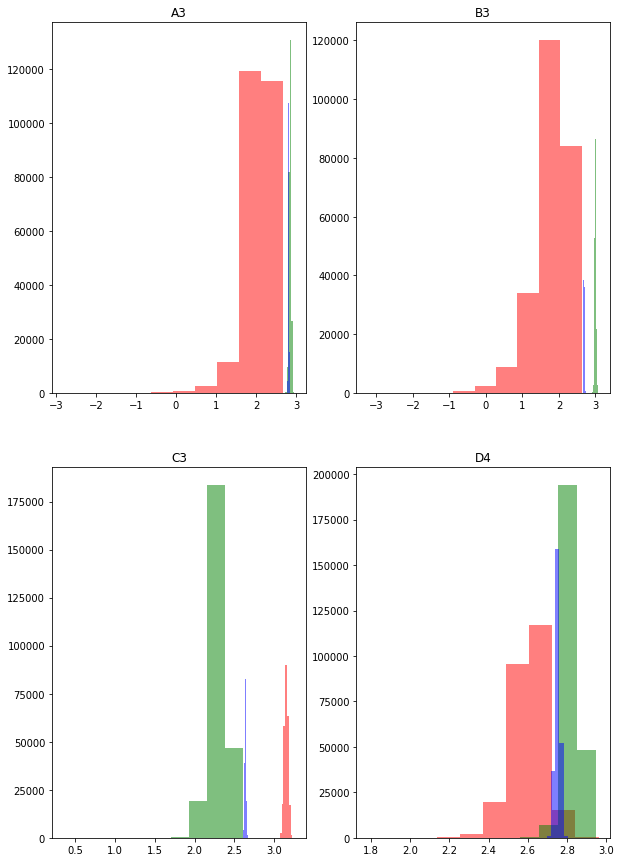

In [21]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

# plot data with subplots
fig = plt.figure()
gs = fig.add_gridspec(2,2)
(ax1, ax2),(ax3, ax4) = gs.subplots()

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_3_dimension_split(sRGB, y1, y2, x1, x2)
        if i==0:
            ax1.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax1.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax1.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax1.set_title(f"{tile}")
        elif i==1:
            ax2.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax2.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax2.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax2.set_title(f"{tile}")
        elif i==2:
            ax3.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax3.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax3.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax3.set_title(f"{tile}")
        elif i==3:
            ax4.hist(np.log10(red) ,alpha=0.5, label=f'R_{tile}', color='r')
            ax4.hist(np.log10(green) ,alpha=0.5, label=f'G_{tile}', color='g')
            ax4.hist(np.log10(blue) ,alpha=0.5, label=f'B_{tile}', color='b')
            ax4.set_title(f"{tile}")


plt.savefig(f'./Documents/subplots_4_sRGB.png')
plt.show()

In [ ]:
# sRGB statistics

In [22]:
np.min(sRGB)

1.4624014371023009e-05

In [23]:
np.max(sRGB)

4090.588411871296

In [24]:
np.mean(sRGB)

664.2689229477756

In [27]:
np.median(sRGB)

574.0902870157032

In [35]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_3_dimension_split(sRGB, y1, y2, x1, x2)
        print(f"RGB-Median for {tile}, R:{np.median(red)}, G:{np.median(green)}, B:{np.median(blue)}")
        print("\n")
        print(f"RGB-Median for {tile}, R:{np.median(red)/4096*255}, G:{np.median(green)/4096*255}, B:{np.median(blue)/4096*255}")
        print("\n\n")

RGB-Median for A3, R:124.85128873384221, G:701.4316486120301, B:644.1855204021127


RGB-Median for A3, R:7.772724274201602, G:43.668230077164964, B:40.10432316956512



RGB-Median for B3, R:78.23388821428222, G:994.1361197153624, B:487.6655336530562


RGB-Median for B3, R:4.870517943027823, G:61.89079846860776, B:30.360036885138996



RGB-Median for C3, R:1417.4065114045184, G:202.9286346753855, B:433.8271265240549


RGB-Median for C3, R:88.24186045120904, G:12.633496543511548, B:27.008280581941893



RGB-Median for D4, R:411.97123854780835, G:667.2540374068253, B:566.771815477326


RGB-Median for D4, R:25.647623493576937, G:41.54047352020031, B:35.284866442069855





In [36]:
# blue green red gray_card
tiles = ["A3", "B3", "C3", "D4"]

for i, tile in enumerate(tiles):
        y1 = int(dict_cc_field[tile][0])
        y2 = int(dict_cc_field[tile][1])
        x1 = int(dict_cc_field[tile][2])
        x2 = int(dict_cc_field[tile][3])
        red, green, blue = get_3_dimension_split(sRGB, y1, y2, x1, x2)
        print(f"RGB-mean for {tile}, R:{np.mean(red)}, G:{np.mean(green)}, B:{np.mean(blue)}")
        print("\n")
        print(f"RGB-mean for {tile}, R:{np.mean(red)/4096*255}, G:{np.mean(green)/4096*255}, B:{np.mean(blue)/4096*255}")
        print("\n\n")

RGB-mean for A3, R:126.18442788802561, G:700.9117003762487, B:644.0548106903366


RGB-mean for A3, R:7.85571999791175, G:43.635860252915876, B:40.09618572412984



RGB-mean for B3, R:87.23092810251194, G:994.1730842639807, B:487.76528948309635


RGB-mean for B3, R:5.430636393100719, G:61.89309972834841, B:30.366247270065813



RGB-mean for C3, R:1418.115124733193, G:203.15185300353434, B:433.9141903125128


RGB-mean for C3, R:88.28597578295025, G:12.647393192358706, B:27.013700812912784



RGB-mean for D4, R:413.10221496097256, G:666.1346020208567, B:566.6405545256497


RGB-mean for D4, R:25.718033402111327, G:41.47078210823205, B:35.276694678720865



